# Report 1
- How parameters fitted to fastest and slowest experiments generalize to other data
- Params fitted to figures 7b and 7d in Exp5

In [22]:
import sys
from pathlib import Path

current_dir = Path.cwd()
parent_dir = current_dir.parent.parent.parent
sys.path.append(str(parent_dir))

import pickle, numpy as np, matplotlib.pyplot as plt
from optimize import evaluate

In [23]:
import os

# Getting all data
with open('saved_results_2023-12-12_08-01-37.pkl', 'rb') as file:
    variables = pickle.load(file)

# Mdata
mdata = []
for fname in os.listdir('data'):
    data = np.loadtxt(os.path.join('data',fname))
    P11 = data[:, 0]
    stretch = data[:, 2]/100 + 1
    t = data[:, 4]
    true_strain = np.log(stretch)
    true_stress = P11*stretch
    mdata.append((t, true_strain, true_stress))

# Params and Loss History
params_hist = variables[2]
loss_hist = variables[3]
params_out = params_hist[np.argmin(loss_hist)]

In [24]:
%%capture
mat = 'ubbmi'

pred_train = evaluate(variables[1], params_out, mat)
pred_test = evaluate(mdata, params_out, mat)

In [25]:
# Print the results

# Parameters and Loss
coef = 2
params_names = ['mu', 'mu_v', 'N', 'N_v', 'tau_hat'] + [f'a{j}'.format(j=j) for j in range(1, coef+1)]
print("---Learned Parameters---")
for i, name in enumerate(params_names):
    print(f'{name:>8}: {params_out[i]}')
print(f'    Loss: {min(loss_hist)}')

---Learned Parameters---
      mu: 0.3986210817663346
    mu_v: 0.31079356144195036
       N: 9.813401931176454
     N_v: 6.847544578355476
 tau_hat: 9.810190221601243
      a1: 2.3330635530170754
      a2: 2.354779460874967
    Loss: 0.005883171869714707


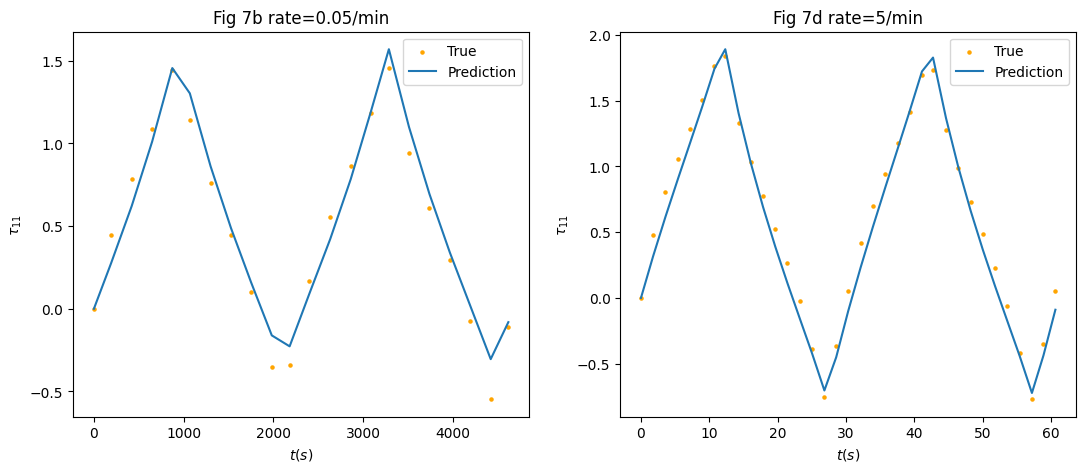

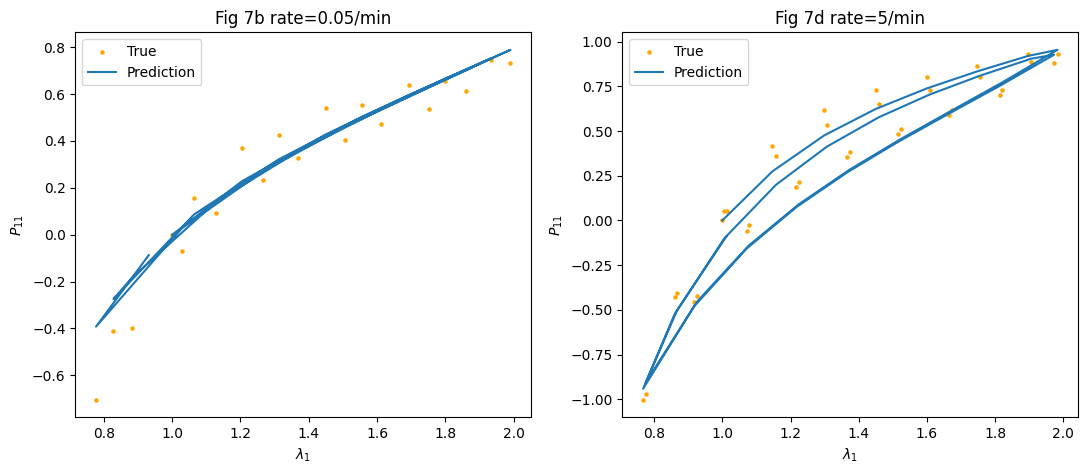

In [27]:
titles = ['Fig 7b rate=0.05/min', 'Fig 7d rate=5/min']

figsize = (20, 5)

# Plots (true stress vs Time)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_train, variables[1], titles)):
    plt.subplot(1, 2, i+1)
    plt.scatter(t, y, label='True', s=5, c='orange')
    plt.plot(t, yp, label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_train, variables[1], titles)):
    plt.subplot(1, 2, i+1)
    plt.scatter(np.exp(x), y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()


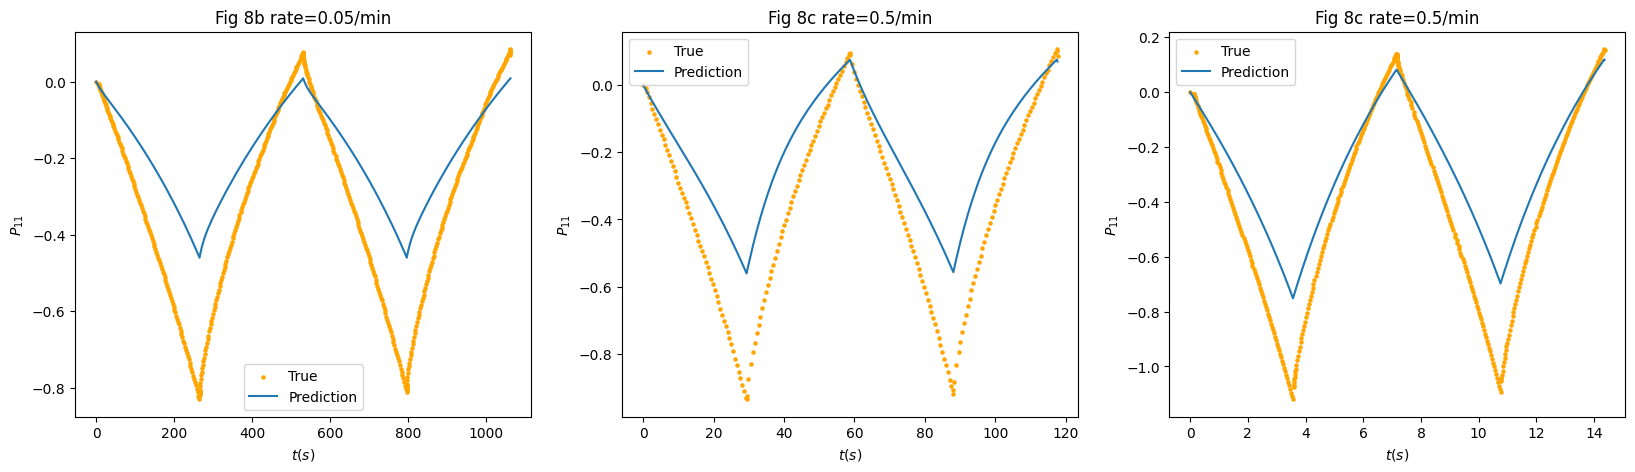

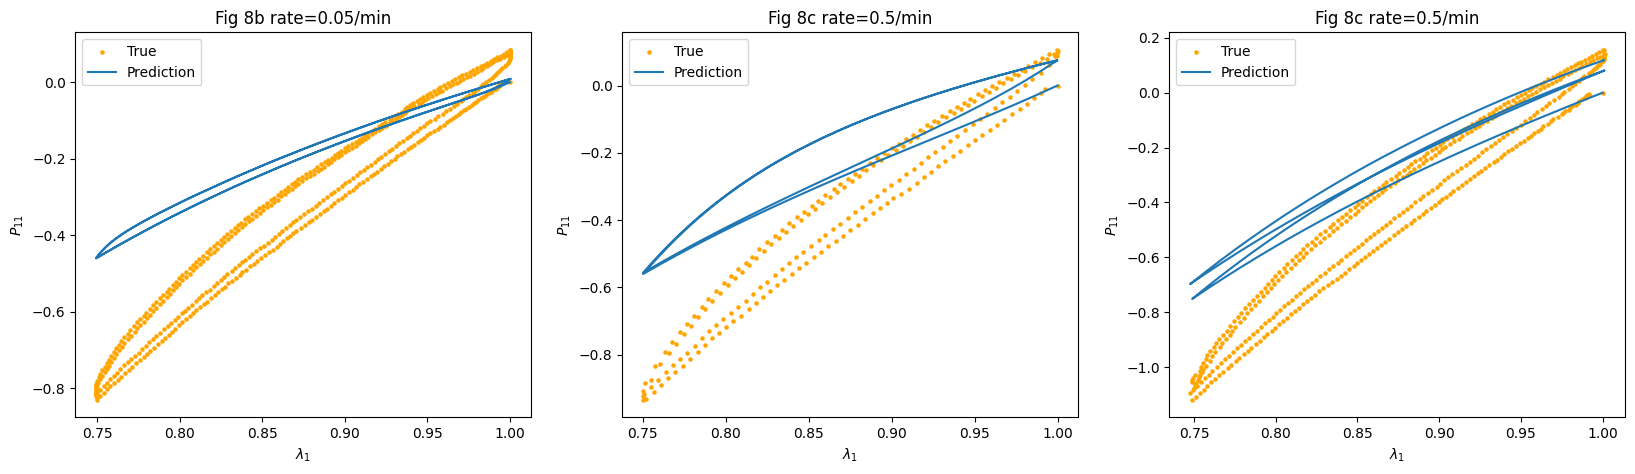

In [37]:
titles = ['Fig 8b rate=0.05/min', 'Fig 8c rate=0.5/min', 'Fig 8c rate=0.5/min']

figsize = (20, 5)

# Plots (true stress vs Time)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_test[:3], mdata[:3], titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(t, y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(t, yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.figure(figsize=figsize)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_test[:3], mdata[:3], titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(np.exp(x), y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

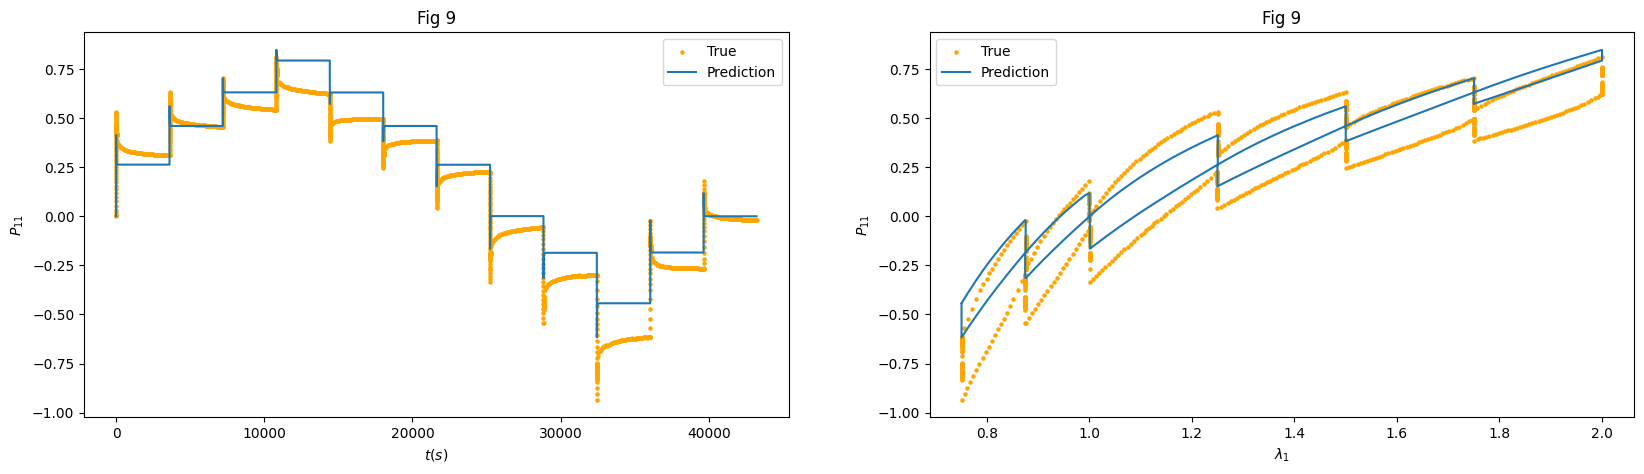

In [35]:
titles = ['Fig 9']

figsize = (20, 5)
plt.figure(figsize=figsize)

# Plots (true stress vs Time)
plt.subplot(1, 2, 1)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_test[3:4], mdata[3:4], titles)):
    plt.scatter(t, y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(t, yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.subplot(1, 2, 2)
for i, ((_, _, yp), (t, x, y), title) in enumerate(zip(pred_test[3:4], mdata[3:4], titles)):
    plt.scatter(np.exp(x), y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()

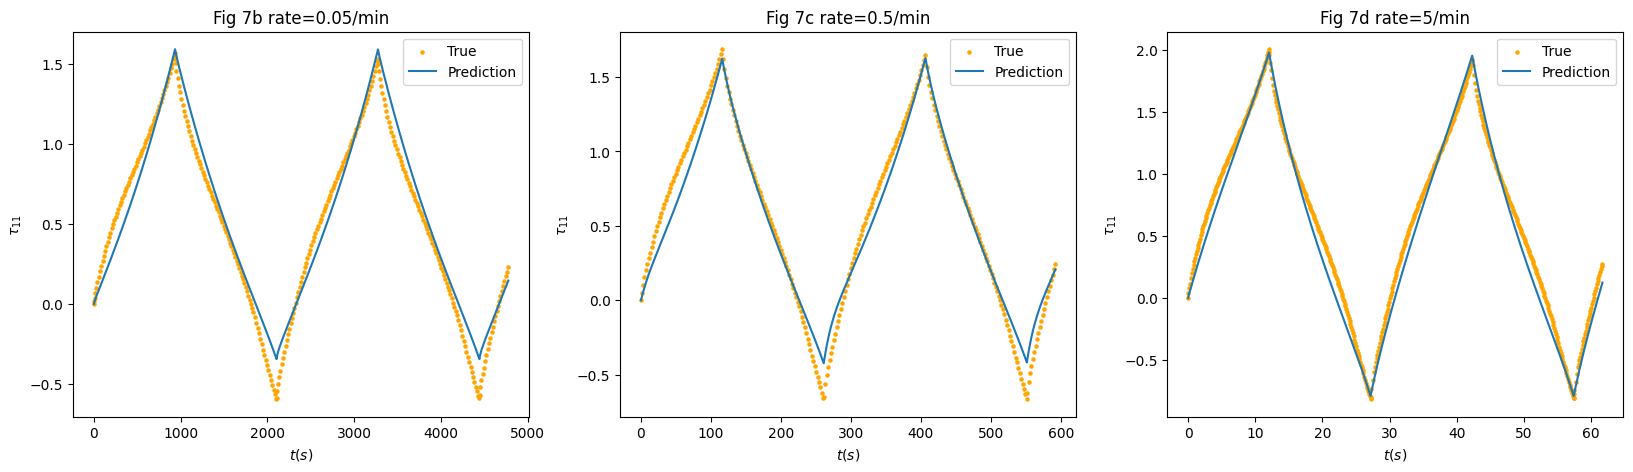

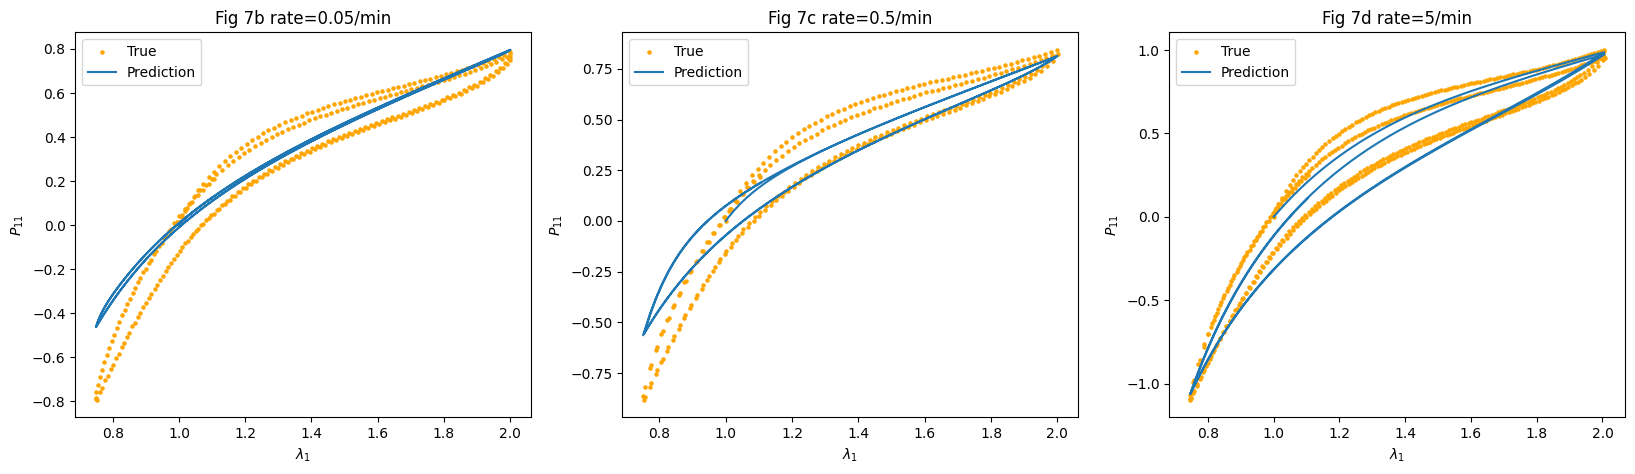

In [43]:
titles = ['Fig 7b rate=0.05/min', 'Fig 7d rate=5/min', 'Fig 7c rate=0.5/min']

figsize = (20, 5)

# Plots (true stress vs Time)
indices = [0, 2, 1]
plt.figure(figsize=figsize)
for (i, (_, _, yp), (t, x, y), title) in zip(indices, pred_test[-3:], mdata[-3:], titles):
    plt.subplot(1, 3, i+1)
    plt.scatter(t, y, label='True', s=5, c='orange')
    plt.plot(t, yp, label='Prediction')
    plt.title(title)
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'$\tau_{11}$')
    plt.legend()

# Plots (P11 vs Stretch)
plt.figure(figsize=figsize)
for (i, (_, _, yp), (t, x, y), title) in zip(indices, pred_test[-3:], mdata[-3:], titles):
    plt.subplot(1, 3, i+1)
    plt.scatter(np.exp(x), y/np.exp(x), label='True', s=5, c='orange')
    plt.plot(np.exp(x), yp/np.exp(x), label='Prediction')
    plt.title(title)
    plt.xlabel(r'$\lambda_1$')
    plt.ylabel(r'$P_{11}$')
    plt.legend()